|<h2>Course:</h2>|<h1><a href="https://udemy.com/course/deeplearning_x/?couponCode=202508" target="_blank">A deep understanding of deep learning</a></h1>|
|-|:-:|
|<h2>Section:</h2>|<h1>Running models on a GPU<h1>|
|<h2>Lecture:</h2>|<h1><b>Implementation<b></h1>|

<br>

<h5><b>Teacher:</b> Mike X Cohen, <a href="https://sincxpress.com" target="_blank">sincxpress.com</a></h5>
<h5><b>Course URL:</b> <a href="https://udemy.com/course/deeplearning_x/?couponCode=202508" target="_blank">udemy.com/course/deeplearning_x/?couponCode=202508</a></h5>
<i>Using the code without the course may lead to confusion or errors.</i>

In [ ]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# Select the processor device

In [ ]:
## Note: To run models on a GPU you must select from the menu:
#   -> Runtime
#     -> Change runtime type
#       -> Hardware accelerator
#         -> GPU

In [ ]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [ ]:
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
      )

# Make some data

In [ ]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

# Send the model and the data to the GPU

In [ ]:
# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [ ]:
data

tensor([[-0.1149, -0.4989,  0.5189,  ..., -0.4267,  0.3315, -0.1041],
        [ 0.6964,  1.5091,  0.4454,  ..., -1.6739,  1.3188,  0.1743],
        [ 1.3306, -0.5536,  1.0730,  ..., -0.0381,  0.5017,  1.4844],
        ...,
        [ 0.7480,  0.4746,  1.1533,  ..., -0.7146,  1.5116, -0.0587],
        [-0.1744,  0.1052, -0.5580,  ..., -0.7922,  0.5522, -0.7527],
        [-0.5287,  1.8756,  1.5005,  ..., -0.2191, -0.3795,  0.0163]],
       device='cuda:0')

In [ ]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model

In [ ]:
output = net(data)

In [ ]:
output.device

device(type='cuda', index=0)

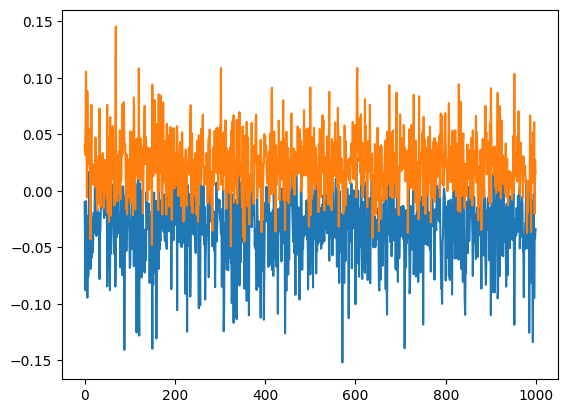

In [ ]:
# try to plot the data
plt.plot(output.detach());

# plt.plot(output.detach().cpu());

# Experiment: Computation time

In [ ]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [ ]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [ ]:
# time in ms
[CPUtime,GPUtime]

[8.397894000000683, 2.866432000000252]

In [ ]:
# but maybe "sending" it to the CPU takes too much overhead?

In [ ]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

[3.552703999999629, 8.397894000000683, 2.866432000000252]